# Summary

<p class="lead">This notebook summarizes the realtime-kinetic measurements.
</p>

## Requirement

Before running this notebook, you need to pre-process the data with:

- [8-spot dsDNA-steady-state - Run-All](8-spot dsDNA-steady-state - Run-All.ipynb)

This pre-processing analyzes the measurement data files, 
compute the moving-window slices, the number of bursts 
and fits the population fractions. All results are saved as TXT in 
the [results](results) folder.

The present notebook loads these results and presents a summary.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import linregress

c:\users\laser2002j\miniconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
dir_ = r'C:\Data\Antonio\data\8-spot 5samples data\2013-05-15/'

filenames = [str(f) for f in Path(dir_).glob('*.hdf5')]
filenames

keys = [f.stem.split('_')[0] for f in Path(dir_).glob('*.hdf5')]
keys

filenames_dict = {k: v.stem for k, v in zip(keys, Path(dir_).glob('*.hdf5'))}
filenames_dict

{'12d': '12d_New_30p_320mW_steer_3',
 '17d': '17d_100p_320mW_steer_1',
 '22d': '22d_30p_320mW_steer_1',
 '27d': '27d_50p_320mW_steer_1',
 '7d': '7d_New_150p_320mW_steer_3',
 'DO12': 'DO12_No2_50p_320mW_steer_1'}

In [3]:
def _filename_fit(idx, method, window, step):
    return 'results/%s_%sfit_ampl_only__window%ds_step%ds.txt' % (filenames_dict[idx], method, window, step)

def _filename_nb(idx, window, step):
    return 'results/%s_burst_data_vs_time__window%ds_step%ds.txt' % (filenames_dict[idx], window, step)

In [4]:
def process(meas_id):
    methods = ['em', 'll', 'hist']

    fig_width = 14
    fs = 18
    def savefig(title, **kwargs):
        plt.savefig("figures/Meas%s %s" % (meas_id, title))

    bursts = pd.DataFrame.from_csv(_filename_nb(meas_id, window=30, step=1))
    
    nbm = bursts.num_bursts.mean()
    nbc = bursts.num_bursts_detrend
    print("Number of bursts (detrended): %7.1f MEAN, %7.1f VAR, %6.3f VAR/MEAN" % 
          (nbm, nbc.var(), nbc.var()/nbm))
    
    fig, ax = plt.subplots(figsize=(fig_width, 3))
    ax.plot(bursts.tstart, bursts.num_bursts)
    ax.plot(bursts.tstart, bursts.num_bursts_linregress, 'r')
    title = 'Number of bursts - Full measurement'
    ax.set_title(title, fontsize=fs)
    savefig(title)
    fig, ax = plt.subplots(figsize=(fig_width, 3))
    ax.plot(bursts.tstart, bursts.num_bursts_detrend)
    ax.axhline(nbm, color='r')
    title = 'Number of bursts (detrended) - Full measurement'
    ax.set_title(title, fontsize=fs)
    savefig(title)
    
    params = {}
    for window in (5, 30):
        for method in methods:
            p = pd.DataFrame.from_csv(_filename_fit(meas_id, method=method, 
                                                    window=window, step=1))
            params[method, window, 1] = p

    meth = 'em'
    fig, ax = plt.subplots(figsize=(fig_width, 3))
    ax.plot('kinetics', data=params[meth, 5, 1], marker='h', lw=0, color='gray', alpha=0.2)
    ax.plot('kinetics', data=params[meth, 30, 1], marker='h', lw=0, alpha=0.5)
    ax.plot('kinetics_linregress', data=params[meth, 30, 1], color='r')
    title = 'Population fraction - Full measurement'
    ax.set_title(title, fontsize=fs)
    savefig(title)
    
    px = params
    print('Kinetics 30s:                    %.3f STD, %.3f STD detrended.' % 
      ((100*px[meth, 30, 1].kinetics).std(), 
       (100*px[meth, 30, 1].kinetics_linregress).std()))

# Measurement 0

Number of bursts (detrended):  2905.7 MEAN,  3948.6 VAR,  1.359 VAR/MEAN
Kinetics 30s:                    1.628 STD, 0.835 STD detrended.


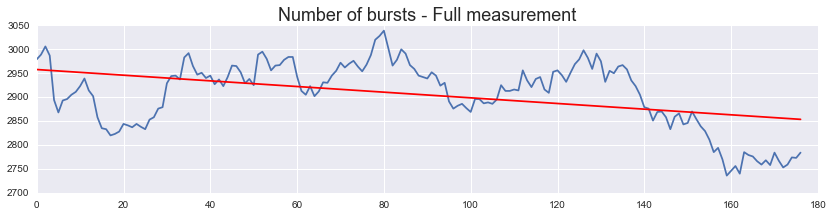

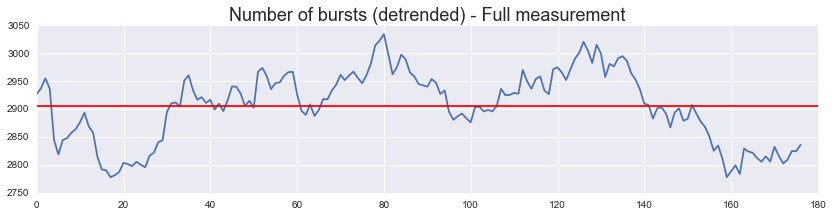

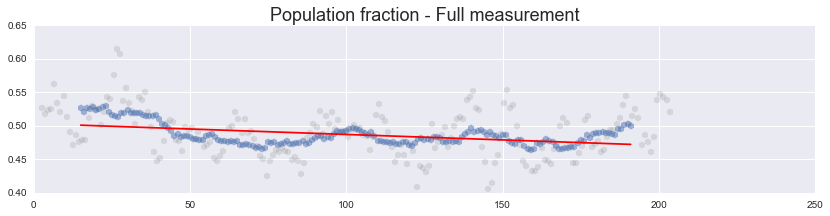

In [5]:
process(meas_id = '7d')

# Measurement 1

Number of bursts (detrended):  1725.8 MEAN,  4028.0 VAR,  2.334 VAR/MEAN
Kinetics 30s:                    2.250 STD, 1.760 STD detrended.


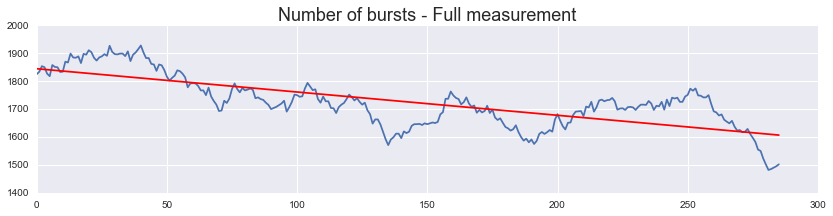

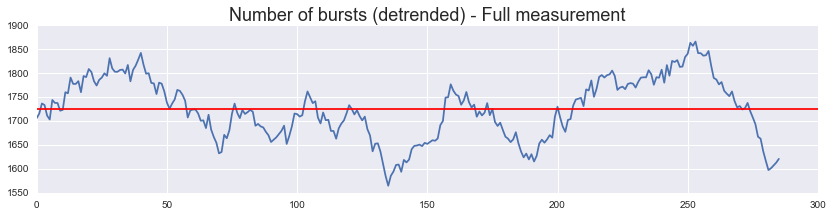

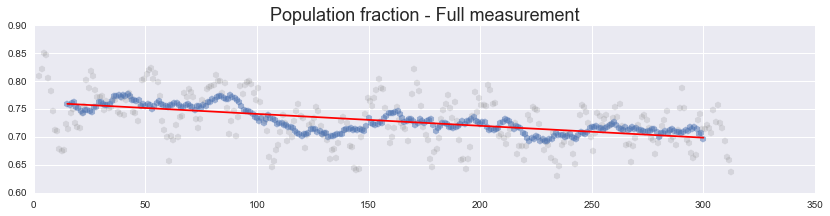

In [6]:
process(meas_id = '12d')

# Measurement 2

Number of bursts (detrended):  2247.2 MEAN,  4309.3 VAR,  1.918 VAR/MEAN
Kinetics 30s:                    1.368 STD, 0.380 STD detrended.


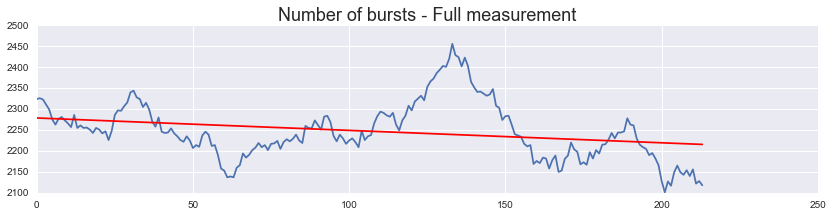

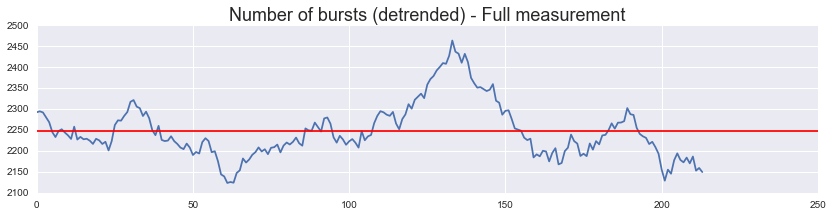

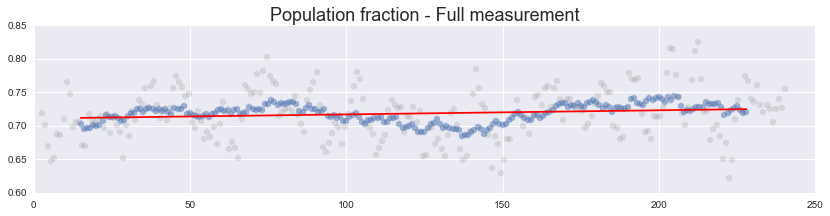

In [7]:
process(meas_id = '17d')